___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___

# WELCOME!

Welcome to "***Car Price Prediction Project***". This is the first medium project of ***Machine Learning*** course. In this project you will have the opportunity to apply many algorithms commonly used for regression problems.

Also, you will apply various processes such as pre-processing, ***train-test spilit*** and ***cross validation*** that you will use in algorithm modeling and prediction processes in Python with ***scikit-learn***. 

Before diving into the project, please take a look at the determines and tasks.

- **NOTE:** This project assumes that you already know the basics of coding in Python. You should also be familiar with the theory behind regression algorithms and scikit-learn module as well as Machine Learning before you begin.


# #Determines

The domain you must have remembered it because you are worked on under project **"EDA for Car Price Prediction Model"**. **Auto Scout** data which using for this project, scraped from the on-line car trading company in 2019, contains many features of 9 different car models. In this project, you will use the data sets prepared for algorithms as a result of the EDA project.

So this study assumes that you are working on the EDA project and that you have sufficient domain knowledge.

Therefore, you will not need any EDA process as you will be working on the edited data.

---

In this case, you will estimate the prices of cars using regression algorithms.

While starting you should import the necessary modules and load the data given as pkl file. Also you'll need to do a few pre-processing before moving to modelling. After that you will implement ***Linear Regression, Ridge Regression, Lasso Regression, Random Forest*** and ***XG Boost*** algorithms respectively. You can measure the success of your models with regression evaluation metrics as well as with cross validation method.

For the better results, you should try to increase the success of your models by performing hyperparameter tuning. Determine feature importances for the model. You can set your model with the most important features for resource saving. You should try to apply this especially in Random Forest and XG Boost algorithms. Unlike the others, you will perform hyperparameter tuning for Random Forest and XG Boost using the ***GridSearchCV*** method. 

Finally You can compare the performances of algorithms, work more on the algorithm have the most successful prediction rate.






# #Tasks

#### 1. Import Modules, Load Data and Data Review
#### 2. Data Pre-Processing
#### 3. Implement Linear Regression 
#### 4. Implement Ridge Regression
#### 5. Implement Lasso Regression 

## 1. Import Modules, Load Data and Data Review

In [108]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.model_selection import train_test_split, GridSearchCV
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [109]:
df = pd.read_pickle("golden_data_dummy.pkl")
df.head()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,...,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0,66.0,56013,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1,1798.0,141.0,80000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,1
2,1598.0,85.0,83450,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
3,1422.0,66.0,73000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
4,1422.0,66.0,16200,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1


In [110]:
pwd

'C:\\Users\\ilkca\\DATA_SCIENCE\\PROJECTS\\06_Machine_Learning\\Car_Price_Predic'

In [111]:
df = pd.read_pickle("golden_data_dummy.pkl")
df.head()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,...,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
0,1422.0,66.0,56013,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
1,1798.0,141.0,80000,1.0,0.0,0.0,0.0,0.0,1.0,1.0,...,0,0,0,1,0,0,0,0,0,1
2,1598.0,85.0,83450,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1
3,1422.0,66.0,73000,1.0,0.0,0.0,1.0,0.0,0.0,1.0,...,0,1,0,0,0,0,0,0,0,1
4,1422.0,66.0,16200,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0,1,0,0,0,0,0,0,0,1


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14990 entries, 0 to 15918
Columns: 136 entries, displacement to type_Used
dtypes: float64(86), int64(5), uint8(45)
memory usage: 11.2 MB


In [113]:
df.shape

(14990, 136)

In [114]:
df.columns

Index(['displacement', 'hp', 'km', 'ss_abs', 'ss_adaptive_cruise_control',
       'ss_adaptive_headlights', 'ss_alarm_system', 'ss_blind_spot_monitor',
       'ss_central_door_lock', 'ss_central_door_lock_with_remote_control',
       ...
       'gearing_type_Semi-automatic', 'fuel_diesel', 'fuel_electric',
       'fuel_gasoline', 'fuel_lpg', 'type_Demonstration',
       'type_Employee's car', 'type_New', 'type_Pre-registered', 'type_Used'],
      dtype='object', length=136)

In [115]:
# EDA

In [116]:
pd.isnull(df).sum()

displacement                  0
hp                            0
km                            0
ss_abs                        0
ss_adaptive_cruise_control    0
                             ..
type_Demonstration            0
type_Employee's car           0
type_New                      0
type_Pre-registered           0
type_Used                     0
Length: 136, dtype: int64

In [117]:
df.isnull().any()

displacement                  False
hp                            False
km                            False
ss_abs                        False
ss_adaptive_cruise_control    False
                              ...  
type_Demonstration            False
type_Employee's car           False
type_New                      False
type_Pre-registered           False
type_Used                     False
Length: 136, dtype: bool

In [118]:
df.corr()

,displacement,hp,km,ss_abs,ss_adaptive_cruise_control,ss_adaptive_headlights,ss_alarm_system,ss_blind_spot_monitor,ss_central_door_lock,ss_central_door_lock_with_remote_control,...,gearing_type_Semi-automatic,fuel_diesel,fuel_electric,fuel_gasoline,fuel_lpg,type_Demonstration,type_Employee's car,type_New,type_Pre-registered,type_Used
displacement,1.000000,0.608069,0.306380,0.039455,0.219180,0.256791,0.075198,0.284346,0.008668,0.011990,...,0.101407,0.647354,-0.004512,-0.643471,-0.027935,-0.036014,-0.002039,-0.089162,-0.104255,0.132912
hp,0.608069,1.000000,0.013735,-0.025535,0.252995,0.331149,0.040451,0.433349,-0.026401,-0.048050,...,0.094190,0.111304,0.009755,-0.107138,-0.034652,0.111306,-0.016734,0.067898,-0.036446,-0.057641
km,0.306380,0.013735,1.000000,0.003092,0.046383,0.007789,0.106760,-0.018739,-0.015460,0.077596,...,0.032341,0.428175,0.002026,-0.433719,0.045312,-0.180433,-0.100492,-0.217220,-0.280735,0.442080
ss_abs,0.039455,-0.025535,0.003092,1.000000,0.043162,0.040839,-0.031936,0.046580,0.248538,0.070964,...,-0.042177,0.019120,-0.023786,-0.020374,0.014457,0.013637,0.021455,0.005178,0.030786,-0.041733
ss_adaptive_cruise_control,0.219180,0.252995,0.046383,0.043162,1.000000,0.202003,0.255668,0.316794,0.037572,0.104905,...,0.239071,0.092960,0.017857,-0.102319,0.071671,0.048770,0.031647,-0.020815,-0.008863,-0.026030
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
type_Demonstration,-0.036014,0.111306,-0.180433,0.013637,0.048770,0.043205,-0.058861,0.106895,0.031162,-0.052810,...,-0.025849,-0.123895,-0.002695,0.125743,-0.014668,1.000000,-0.062618,-0.055877,-0.073438,-0.390428
type_Employee's car,-0.002039,-0.016734,-0.100492,0.021455,0.031647,0.022449,-0.017133,0.013814,0.051146,-0.007933,...,-0.018475,0.003158,-0.003100,-0.002038,-0.008357,-0.062618,1.000000,-0.064264,-0.084460,-0.449029
type_New,-0.089162,0.067898,-0.217220,0.005178,-0.020815,0.028177,-0.024663,0.051672,0.003759,-0.055720,...,-0.017066,-0.163772,-0.002766,0.164474,-0.005645,-0.055877,-0.064264,1.000000,-0.075368,-0.400694
type_Pre-registered,-0.104255,-0.036446,-0.280735,0.030786,-0.008863,-0.019357,-0.019540,0.027960,0.066428,-0.018862,...,-0.033124,-0.137841,-0.003636,0.136149,0.013701,-0.073438,-0.084460,-0.075368,1.000000,-0.526618


In [119]:
df.price.head()

0    15770
1    14500
2    14640
3    14500
4    16790
Name: price, dtype: int64

In [120]:
df.corr()["price"]

displacement                  0.301022
hp                            0.696620
km                           -0.387911
ss_abs                       -0.045100
ss_adaptive_cruise_control    0.248674
                                ...   
type_Demonstration            0.253007
type_Employee's car           0.025844
type_New                      0.208214
type_Pre-registered           0.130463
type_Used                    -0.333761
Name: price, Length: 136, dtype: float64

In [121]:
# heatmap karisik bunlar daha net lik saglar cor["price"] tail 
#ve age, km, betgir gucu vites en onemli feature lar burada
#

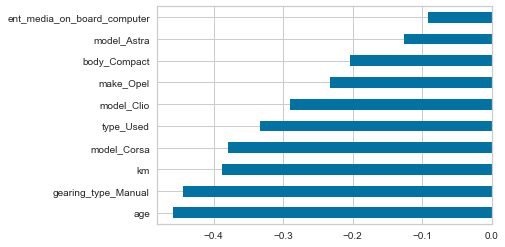

In [122]:
df.corr()["price"].sort_values().head(10).plot.barh()

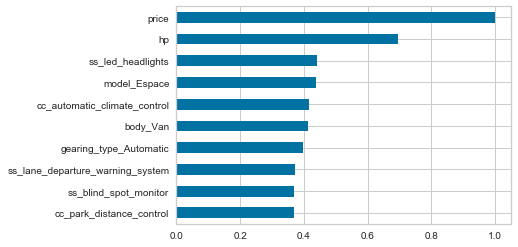

In [123]:
df.corr()["price"].sort_values().tail(10).plot.barh()

In [130]:
sns.distplot["price"]

SyntaxError: invalid syntax (<ipython-input-130-6c328161813c>, line 1)

In [ ]:
sns.boxplot(df.price, orient="v")

## 2. Data Pre-Processing

As you know, the data set must be edited before proceeding to the implementation of the model. As the last step before model fitting, you need to spilit the data set as train and test. Then, you should train the model with train data and evaluate the performance of the model on the test data. You can use the train and test data you have created for all algorithms.

You must also drop your target variable, the column you are trying to predict.

You can use many [performance metrics for regression](https://medium.com/analytics-vidhya/evaluation-metrics-for-regression-problems-343c4923d922) to measure the performance of the regression model you train. You can define a function to view different metric results together.

You can also use the [cross validation](https://towardsdatascience.com/cross-validation-explained-evaluating-estimator-performance-e51e5430ff85) method to measure the estimator performance. Cross validation uses different data samples from your test set and calculates the accuracy score for each data sample. You can calculate the final performance of your estimator by averaging these scores.

In [22]:
X= df.drop("price", axis =1)
y= df["price"]

In [24]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('price',axis=1),
                                                    df['price'], test_size=0.2,
                                                    random_state=42)

In [25]:
X_train.shape

(11242, 135)

In [26]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)


In [28]:
from sklearn.linear_model import LinearRegression

In [29]:
lm =  LinearRegression()
lm.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [30]:
y_pred = lm.predict(X_test)

In [31]:
eval_metrics(y_test, y_pred)

r2_score: 0.8824154541427274 
 mae: 1689.3532442989738 
 mse: 6019220.512007881 
 rmse: 2453.4099763406607


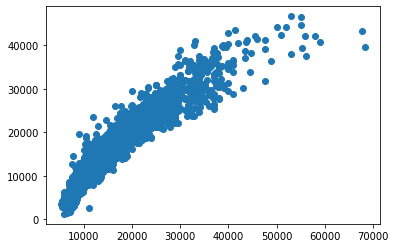

In [32]:
plt.scatter(y_test, y_pred)

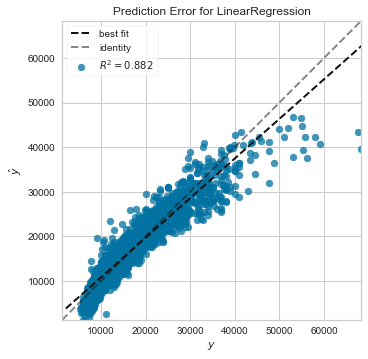

In [33]:
# Pediction library
from yellowbrick.regressor import PredictionError
visualizer = PredictionError(lm)
visualizer.fit(X_train, y_train)  # Fit the training data to the visualizer
visualizer.score(X_test, y_test)  # Evaluate the model on the test data
visualizer.show()

In [ ]:
# Normal dagilim cikmis, ama residual cok var. Maviler cok daginik trainler mesela, fiyatlar yukseldikce tahmin azalmis iyice mesela, model daha cok hata yapmis.

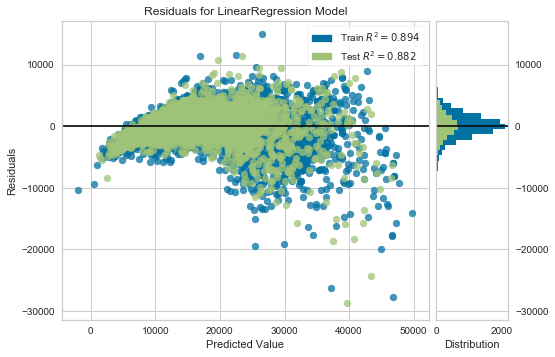

In [34]:
# Yellowbrick Residual Plot
from yellowbrick.regressor import ResidualsPlot
visualizer = ResidualsPlot(lm)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show()


In [36]:
my_dict = { 'Actual': y_test, 'Pred': y_pred }
compare = pd.DataFrame(my_dict)

In [37]:
compare.sample(10)

,Actual,Pred
3324,27500,25625.909361
15691,38580,39888.478757
11409,21000,18749.318981
8938,7950,6727.108819
269,17820,19598.944494
1679,21670,20790.859084
3275,12950,11371.924877
11011,13499,15620.033034
15497,32500,25105.411131
6708,16500,16637.696330


In [42]:
from sklearn.model_selection import cross_val_score
cv_scores = cross_val_score(estimator=lm, X=X_train, y=y_train, cv=5)#default 5 zaten ama yazdik biz yinede cv yi.
cv_scores.mean()


0.8890254742726214

In [43]:
cv_scores ### Accuries

array([0.88854671, 0.88870467, 0.89751273, 0.88704163, 0.88332163])

## 3. Implement Linear Regression

 - Import the modul
 - Fit the model 
 - Predict the test set
 - Determine feature coefficiant
 - Evaluate model performance (use performance metrics for regression and cross_val_score)
 - Compare different evaluation metrics
 
*Note: You can use the [dir()](https://www.geeksforgeeks.org/python-dir-function/) function to see the methods you need.*

## 4. Implement Ridge Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True 
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hiperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RidgeCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value. 

In [45]:
from sklearn.linear_model import Ridge
from sklearn.linear_model import RidgeCV ## bunu Alpha yi secmek icin kullanicaz

In [53]:
ridge_model = Ridge(normalize = True)

In [54]:
ridge_model.fit(X_train, y_train) # su nada makina bunu ogrendi. simdi test edecegiz.

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None, normalize=True,
      random_state=None, solver='auto', tol=0.001)

In [51]:
new_pred = ridge_model.predict(X_test)

In [52]:
eval_metrics(y_test, y_pred)

r2_score: 0.8824154541427274 
 mae: 1689.3532442989738 
 mse: 6019220.512007881 
 rmse: 2453.4099763406607


In [56]:
alpha_space = np.linspace(0.1, 20, 50)

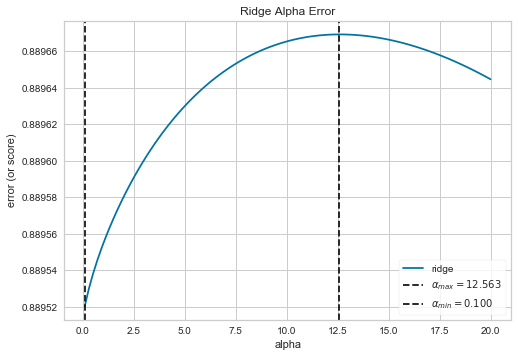

In [69]:
# Let's fit do 
from yellowbrick.regressor import ManualAlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 100)
# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(),
    alphas=alpha_space,
    cv=10
)
visualizer.fit(X_train, y_train)
visualizer.show()

In [78]:
ridgecv = RidgeCV(alphas=alpha_space, cv=10, normalize=True)
ridgecv.fit(X_train, y_train)

RidgeCV(alphas=array([ 0.1       ,  0.50612245,  0.9122449 ,  1.31836735,  1.7244898 ,
        2.13061224,  2.53673469,  2.94285714,  3.34897959,  3.75510204,
        4.16122449,  4.56734694,  4.97346939,  5.37959184,  5.78571429,
        6.19183673,  6.59795918,  7.00408163,  7.41020408,  7.81632653,
        8.22244898,  8.62857143,  9.03469388,  9.44081633,  9.84693878,
       10.25306122, 10.65918367, 11.06530612, 11.47142857, 11.87755102,
       12.28367347, 12.68979592, 13.09591837, 13.50204082, 13.90816327,
       14.31428571, 14.72040816, 15.12653061, 15.53265306, 15.93877551,
       16.34489796, 16.75102041, 17.15714286, 17.56326531, 17.96938776,
       18.3755102 , 18.78163265, 19.1877551 , 19.59387755, 20.        ]),
        cv=10, fit_intercept=True, gcv_mode=None, normalize=True, scoring=None,
        store_cv_values=False)

In [79]:
ridgecv.alpha_

0.1

In [77]:
alpha_space = np.linspace(0.1,20,50)
ridgecv = RidgeCV(alphas=alpha_space, cv=10, normalize = True)
ridgecv.fit(X_train, y_train)
print('Best alpha:', ridgecv.alpha_)

Best alpha: 0.1


In [67]:
from yellowbrick.regressor import ManualAlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 100)
# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(normalize=True),
    alphas=alpha_space,
    cv=5
)
visualizer.fit(X_train, y_train)
visualizer.show() from yellowbrick.regressor import ManualAlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 100)
# Instantiate the visualizer
visualizer = ManualAlphaSelection(
    Ridge(normalize=True),
    alphas=alpha_space,
    cv=5
)
visualizer.fit(X_train, y_train)
visualizer.show()

SyntaxError: invalid syntax (<ipython-input-67-607948a3898d>, line 11)

In [58]:
ridge_model = Ridge(0.1, normalize=True).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8773867913436509 
 mae: 1698.1766212453338 
 mse: 6276640.652107866 
 rmse: 2505.3224646954864


In [59]:
ridge_model = Ridge(0.01, normalize=True).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8821052255348836 
 mae: 1687.955668898393 
 mse: 6035101.292820793 
 rmse: 2456.6443154882622


In [ ]:
# alpha "0" ise linear model e geri donuyor burda da alpha kuculdukca daha iyi cikti score lar zaten ridge pek ise yaramadi.

In [61]:
ridge_model = Ridge(17, normalize=True).fit(X_train, y_train)
y_pred = ridge_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.36284981237276737 
 mae: 4285.328603216059 
 mse: 32616084.457652442 
 rmse: 5711.0493306968065


## 5. Implement Lasso Regression

- Import the modul 
- Do not forget to scale the data or use Normalize parameter as True
- Fit the model 
- Predict the test set 
- Evaluate model performance (use performance metrics for regression) 
- Tune alpha hyperparameter by using [cross validation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LassoCV.html) and determine the optimal alpha value.
- Fit the model and predict again with the new alpha value.
- Compare different evaluation metrics

*Note: To understand the importance of the alpha hyperparameter, you can observe the effects of different alpha values on feature coefficants.*

In [75]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import LassoCV

In [76]:
lasso_model = Lasso()
lasso_model.fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8832595815859718 
 mae: 1684.3902982019736 
 mse: 5976009.142825974 
 rmse: 2444.5877245102033


In [82]:
alpha_space = np.linspace(0.1, 20, 100)
lasso_cv_model = LassoCV(alphas = alpha_space, normalize=True, cv = 5).fit(X_train, y_train)

In [95]:
lasso_cv_model.alpha_

0.1

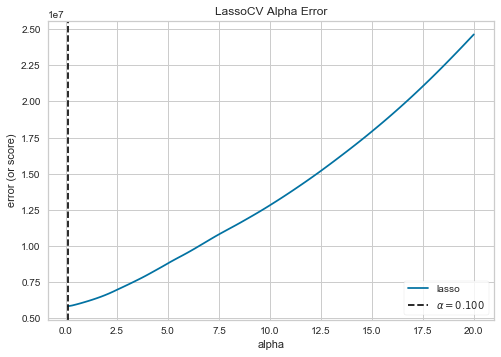

In [96]:
from sklearn.linear_model import LassoCV
from yellowbrick.regressor import AlphaSelection
# Create a list of alphas to cross-validate against
alpha_space = np.linspace(0.1, 20, 100)
# Instantiate the linear model and visualizer
model = LassoCV(alphas=alpha_space, normalize=True)
visualizer = AlphaSelection(model)
visualizer.fit(X_train, y_train)
visualizer.show()

In [97]:
lasso_model = Lasso(0.1, normalize=True).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8824636699377881 
 mae: 1684.9750387441754 
 mse: 6016752.317735275 
 rmse: 2452.9069117549643


In [98]:
lasso_model = Lasso(0.1, normalize=True).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8824636699377881 
 mae: 1684.9750387441754 
 mse: 6016752.317735275 
 rmse: 2452.9069117549643


In [99]:
 #Create features DataFrame
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})

In [100]:
significant_feature= 

SyntaxError: invalid syntax (<ipython-input-100-078d677eb69b>, line 1)

In [125]:
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

118

In [126]:
lasso_model = Lasso(6, normalize=True).fit(X_train, y_train)
y_pred = lasso_model.predict(X_test)
eval_metrics(y_test, y_pred)

r2_score: 0.8112956664426831 
 mae: 2156.203526390214 
 mse: 9659883.337319763 
 rmse: 3108.0352857263


In [127]:
significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

118

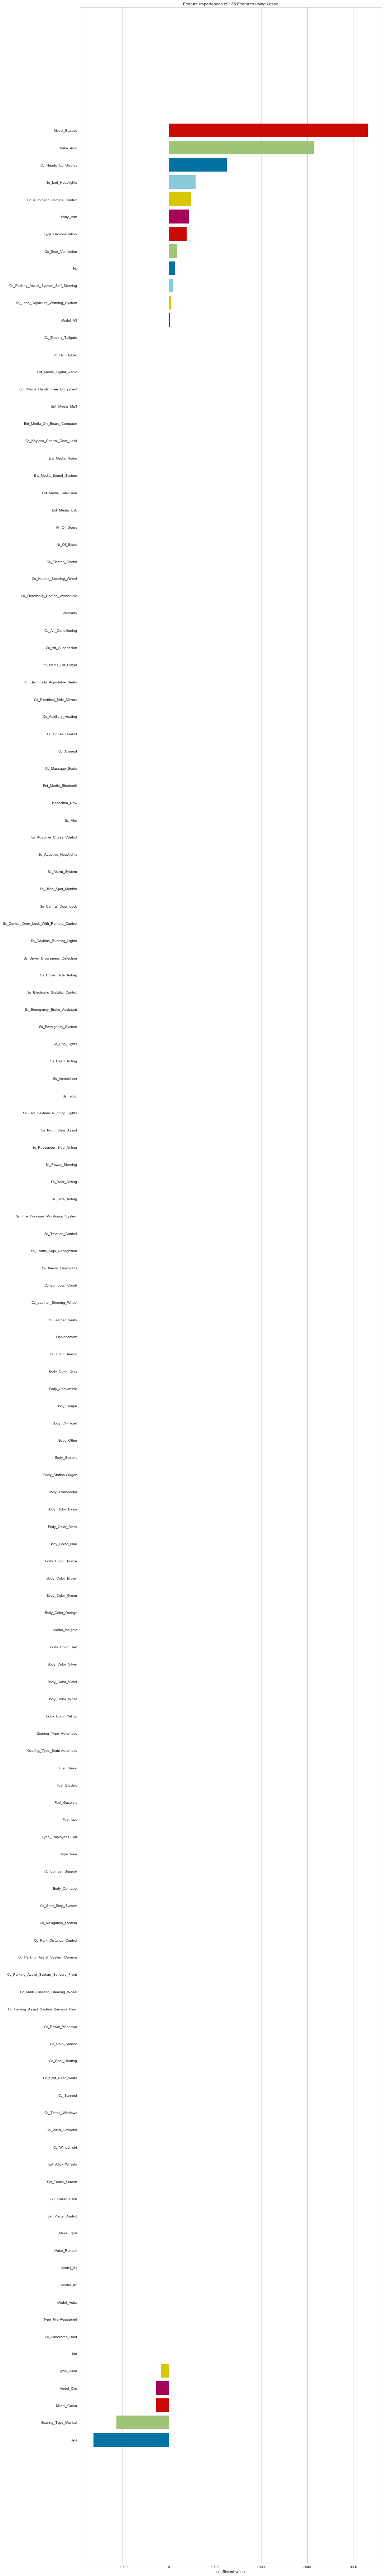

In [128]:
from yellowbrick.features import RadViz
from yellowbrick.model_selection import FeatureImportances
# Load the regression dataset
# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), X.columns))
viz = FeatureImportances(lasso_model, labels=labels, relative=False)
visualizer = RadViz(size=(1080, 7200))
# Fit and show the feature importances
viz.fit(X_train, y_train)
viz.show()

#Create features DataFrame
feature_coef = pd.DataFrame({'features' : X.columns, 'coef' : lasso_model.coef_})

significant_features = feature_coef.loc[feature_coef.coef != 0, :]
len(significant_features)

___

<p style="text-align: center;"><img src="https://docs.google.com/uc?id=1lY0Uj5R04yMY3-ZppPWxqCr5pvBLYPnV" class="img-fluid" alt="CLRSWY"></p>

___